<h1>Time-varying synchrotron spectrum</h1>

In this example we set up a model with a source with a synchrotron spectrum, produced by a family of electrons with a power law energy distribution. We make the index of the electron distribution vary linearly with time, and we let the magnetic field decay as a power law.

In [1]:
from astromodels import *

# Set up the particle distribution for the electrons

particle_distribution = powerlaw(logK=10)

particle = ParticleSource('electrons',distribution_shape = particle_distribution)

# Now set up the synch. spectrum for our source and the source itself

synch_spectrum = synchrotron()
synch_spectrum.B.set(125 * u.uG)

# Use the particle distribution we created as source for the electrons
# producing synch. emission

synch_spectrum.particle_distribution = particle_distribution

synch_source = PointSource('synch_source',ra=12.6, dec=-13.5, spectral_shape=synch_spectrum)

# Create the model

my_model = Model(particle, synch_source)

my_model.display()

/home/giacomov/software/canopy-env/lib/python2.7/site-packages/astromodels-0.1-py2.7.egg/astromodels/parameter.py:363: WarningUnitsAreSlow: Using units is convenient but slow. Do not use them during computing-intensive work.
  WarningUnitsAreSlow)


name,value,min_value,max_value,delta,free
electrons.spectrum.main.powerlaw.logK,10.0,-40,40,0.1,True
electrons.spectrum.main.powerlaw.index,-2.0,-10,10,0.2,True
synch_source.spectrum.main.synchrotron.B,0.000125,None,None,3.24e-07,True


In [2]:
# Now make the model time-dependent by adding the independent variable time

time = IndependentVariable("time", 1)

my_model.add_independent_variable(time)

# Make the magnetic field decay as a power law

my_model.link(my_model.synch_source.spectrum.main.synchrotron.B,
             time,
             powerlaw(logK=np.log10(0.000125), index=-1.2))

# Make the index of the electron distribution increase linearly with time

my_model.link(my_model.electrons.spectrum.main.powerlaw.index,
             time,
             line(logK=0, a=2e-3,b=-1.6))

# Display the model
my_model.display()

Point sources: synch_source

Extended sources: (none)

Particle sources: electrons

Free parameters:
                          name                              value      ... free
------------------------------------------------------- -------------- ... ----
                  electrons.spectrum.main.powerlaw.logK           10.0 ... True
       electrons.spectrum.main.powerlaw.index.line.logK            0.0 ... True
          electrons.spectrum.main.powerlaw.index.line.a          0.002 ... True
          electrons.spectrum.main.powerlaw.index.line.b           -1.6 ... True
 synch_source.spectrum.main.synchrotron.B.powerlaw.logK -3.90308998699 ... True
synch_source.spectrum.main.synchrotron.B.powerlaw.index           -1.2 ... True


Linked parameters:
                  name                   linked to function current value
---------------------------------------- --------- -------- -------------
  electrons.spectrum.main.powerlaw.index      time     line        -1.598
synch_source.spectrum.main.synchrotron.B      time powerlaw      0.000125

/home/giacomov/software/canopy-env/lib/python2.7/site-packages/astromodels-0.1-py2.7.egg/astromodels/functions/functions.py:70: RuntimeWarning: divide by zero encountered in power
  return 10 ** logK * np.power(x / piv, index)


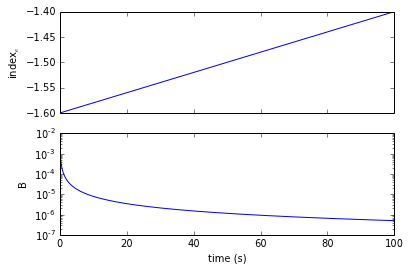

In [3]:
import matplotlib.pyplot as plt

# This is needed only in the IPython notebook
%matplotlib inline

times = np.linspace(0,100,1000)

p1 = my_model['electrons.spectrum.main.powerlaw.index']
p2 = my_model['synch_source.spectrum.main.synchrotron.B']

fig, subs = plt.subplots(2,1, sharex=True)

for sub, par, label in zip(subs,[p1,p2],[r'index${_e}$',r'B']):
    
    lc = []
    
    for t in times:
    
        time.value = t
    
        lc.append(par.value)

    sub.plot(times, lc)    
    sub.set_ylabel(label)

subs[-1].set_xlabel('time (s)')

subs[-1].set_yscale("log")

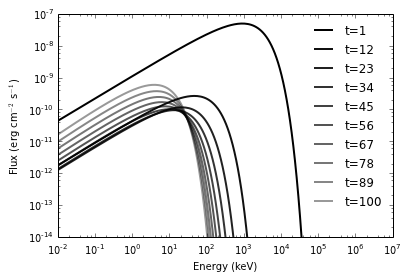

In [4]:
energies = np.logspace(-2,7,200)

#s = my_model.synch_source.spectrum.main(energies)

for i,tt in enumerate(np.linspace(1,100,10)):
    
    my_model['time'].value = tt
    
    s = my_model.synch_source.spectrum.main(energies)
    
    #print s.value
    
    plt.loglog(energies, energies*energies*s.value*1.602e-9, label='t=%.0f' % tt,
              alpha=1-float(i)/15.0, color='black',linewidth=2)

plt.ylim([1e-14,None])

plt.xlabel("Energy (keV)")
plt.ylabel(r"Flux (erg cm$^{-2}$ s$^{-1}$)")
plt.legend(loc=0, frameon=False)

In [5]:
my_model.save("naima_test.yml",overwrite=True)